# EDA

1. Exploración inicial
2. Transformación de datos
3. Memoria
4. Nombre de las columnas
5. Datos inconsistentes

6. Duplicados
  - Duplicados implícitos
  - Duplicados explícitos

7. Datos faltantes
  - Missing at random
  - Missing completely at random
  - Missing not at random
  
8. Imputación

9. Outliers
  - Univariados
  - Multivariados

10. Agrupamiento y tablas pivot

11. Estadística descriptiva
  - Medidas de tendencia central
  - Medidas de dispersión
  - Medias de asociación

12. Exploración gráfica
  - Univariado
  - Bivariado





In [5]:
!pip install wooldridge pingouin missingno

import wooldridge as wd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as st
import pingouin as pg

import missingno as ms

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer, MissingIndicator
from scipy.spatial.distance import mahalanobis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
wage = wd.data('wage1')
mroz = wd.data('mroz')

In [7]:
dataset = pd.read_csv('https://raw.githubusercontent.com/labeconometria/MLxE/main/proyectos1er/dataset_1.csv')

In [8]:
dataset

,user_id,gender,wage,purchased,birth_day
0,217,Female,NaN,0,1983-08-06
1,226,Female,146500.0,1,1972-01-28
2,697,Male,NaN,1,1981-12-12
3,743,Female,NaN,0,1983-05-26
4,63,Female,140500.0,1,1967-11-02
...,...,...,...,...,...
1169,636,Male,76500.0,0,1970-08-26
1170,320,Female,143500.0,1,1970-04-07
1171,136,Female,NaN,1,1968-12-28
1172,721,Male,148000.0,1,1993-11-23


## Exploración inicial

In [9]:
wage.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [10]:
wage.tail()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1
525,3.50,14,5,4,1,1,0,2,0,0,...,0,0,0,1,0,1,0,1.252763,25,16


In [11]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

In [12]:
wage = wage.filter(['wage', 'educ', 'exper', 'tenure', 'female', 'married'])

In [14]:

mroz.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040.0,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300.0,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300.0,0.6215,12,14,9.5,1,7,20.100058,1.524272,49


In [15]:
mroz.tail()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
748,0,0,0,2,40,13,NaN,0.0,3020,43,...,28200.0,0.6215,10,10,9.5,1,5,28.200001,NaN,25
749,0,0,2,3,31,12,NaN,0.0,2056,33,...,10000.0,0.7715,12,12,7.5,0,14,10.000000,NaN,196
750,0,0,0,0,43,12,NaN,0.0,2383,43,...,9952.0,0.7515,10,3,7.5,0,4,9.952000,NaN,16
751,0,0,0,0,60,12,NaN,0.0,1705,55,...,24984.0,0.6215,12,12,14.0,1,15,24.983999,NaN,225
752,0,0,0,3,39,9,NaN,0.0,3120,48,...,28363.0,0.6915,7,7,11.0,1,12,28.363001,NaN,144


In [16]:
mroz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   inlf      753 non-null    int64  
 1   hours     753 non-null    int64  
 2   kidslt6   753 non-null    int64  
 3   kidsge6   753 non-null    int64  
 4   age       753 non-null    int64  
 5   educ      753 non-null    int64  
 6   wage      428 non-null    float64
 7   repwage   753 non-null    float64
 8   hushrs    753 non-null    int64  
 9   husage    753 non-null    int64  
 10  huseduc   753 non-null    int64  
 11  huswage   753 non-null    float64
 12  faminc    753 non-null    float64
 13  mtr       753 non-null    float64
 14  motheduc  753 non-null    int64  
 15  fatheduc  753 non-null    int64  
 16  unem      753 non-null    float64
 17  city      753 non-null    int64  
 18  exper     753 non-null    int64  
 19  nwifeinc  753 non-null    float64
 20  lwage     428 non-null    float6

In [17]:
mroz = mroz.filter(['inlf', 'kidslt6', 'kidsge6', 'age', 'educ', 'huswage', 'huseduc', 'exper'])

## Transformación de datos y manejo de memoria

In [18]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     526 non-null    float64
 1   educ     526 non-null    int64  
 2   exper    526 non-null    int64  
 3   tenure   526 non-null    int64  
 4   female   526 non-null    int64  
 5   married  526 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 24.8 KB


In [19]:
wage = wage.astype({'wage':'float16',
                    'educ':'int16',
                    'exper':'int16',
                    'tenure':'int16',
                    'female':'int16',
                    'married':'int16'})

In [20]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     526 non-null    float16
 1   educ     526 non-null    int16  
 2   exper    526 non-null    int16  
 3   tenure   526 non-null    int16  
 4   female   526 non-null    int16  
 5   married  526 non-null    int16  
dtypes: float16(1), int16(5)
memory usage: 6.3 KB


In [21]:
mroz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inlf     753 non-null    int64  
 1   kidslt6  753 non-null    int64  
 2   kidsge6  753 non-null    int64  
 3   age      753 non-null    int64  
 4   educ     753 non-null    int64  
 5   huswage  753 non-null    float64
 6   huseduc  753 non-null    int64  
 7   exper    753 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 47.2 KB


In [22]:
mroz = mroz.astype({'inlf': 'int16',
                    'kidslt6': 'int16',
                    'kidsge6': 'int16',
                    'age': 'int16',
                    'educ': 'int16',
                    'huswage': 'float16',
                    'huseduc': 'int16',
                    'exper': 'int16'})

In [23]:
mroz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inlf     753 non-null    int16  
 1   kidslt6  753 non-null    int16  
 2   kidsge6  753 non-null    int16  
 3   age      753 non-null    int16  
 4   educ     753 non-null    int16  
 5   huswage  753 non-null    float16
 6   huseduc  753 non-null    int16  
 7   exper    753 non-null    int16  
dtypes: float16(1), int16(7)
memory usage: 11.9 KB


In [24]:
mroz.columns = mroz.columns.str.lower()

In [25]:
wage.columns

Index(['wage', 'educ', 'exper', 'tenure', 'female', 'married'], dtype='object')

## Datos inconsistentes

In [26]:
wage = (wage
        .replace({'female':{1:'female',
                            0:'male'},
                  'married':{1:'married',
                             0:'single'}})
        .rename(columns={'female':'gender',
                         'married':'family_status'}))

## Duplicados

### Duplicados implícitos

In [27]:
wage['gender'] = [np.random.choice([i, i.upper()[:3]], p=(0.8,0.2)) for i in wage['gender']]

In [28]:
wage['gender'].value_counts(normalize=True)

male      0.420152
female    0.353612
FEM       0.125475
MAL       0.100760
Name: gender, dtype: float64

In [29]:
wage['gender'].unique()

array(['FEM', 'female', 'male', 'MAL'], dtype=object)

In [30]:
wage = (wage
        .replace({'MAL':'male',
                  'FEM':'female'}))
wage['gender'].value_counts()

male      274
female    252
Name: gender, dtype: int64

In [31]:
wage['gender'].value_counts(normalize=True)

male      0.520913
female    0.479087
Name: gender, dtype: float64

### Duplicados explícitos

In [35]:
wage.duplicated().sum()

0

In [33]:
wage = wage.drop_duplicates().reset_index(drop=True)

## Datos faltantes

In [34]:
wage_mar = wage.copy()
wage_mcar = wage.copy()
wage_mnar = wage.copy()

### MAR

In [36]:
wage_mar['tenure'] = [np.random.choice([i, np.nan], p=(0.9, 0.1)) for i in wage_mar['tenure']]
wage_mar

,wage,educ,exper,tenure,gender,family_status
0,3.099609,11,2,0.0,female,single
1,3.240234,12,22,NaN,female,married
2,3.000000,11,2,0.0,male,single
3,6.000000,8,44,28.0,male,married
4,5.300781,12,7,2.0,male,married
...,...,...,...,...,...,...
519,15.000000,16,14,2.0,female,married
520,2.269531,10,2,0.0,female,single
521,4.671875,15,13,18.0,male,married
522,11.562500,16,5,1.0,male,married


In [37]:
wage_mar.isna().sum()

wage              0
educ              0
exper             0
tenure           44
gender            0
family_status     0
dtype: int64

### MNAR

In [38]:
def function_nan(row):
  tenure = row['tenure']
  gender = row['gender']
  if gender == 'female':
    return np.random.choice([tenure, np.nan], p=(0.75, 0.25))
  return tenure

In [39]:
wage_mnar['tenure'] = wage_mnar.apply(function_nan, axis=1)

In [40]:
no_nan = wage_mnar.dropna()

In [41]:
wage_mnar['gender'].value_counts(normalize=True)

male      0.519084
female    0.480916
Name: gender, dtype: float64

In [42]:
no_nan['gender'].value_counts(normalize=True)

male      0.588745
female    0.411255
Name: gender, dtype: float64

## Imputación

In [56]:
wage_imput = wage.copy()

In [57]:
def function_nan(row):
  tenure = row['tenure']
  wage = row['wage']
  if tenure < 7.5:
    return np.random.choice([wage, np.nan], p=(0.75, 0.25))
  return wage

In [58]:
wage_imput['wage'] = wage_imput.apply(function_nan, axis=1)

In [59]:
wage_imput.isna().sum()

wage             96
educ              0
exper             0
tenure            0
gender            0
family_status     0
dtype: int64

### Estadísticos generales

<AxesSubplot:>

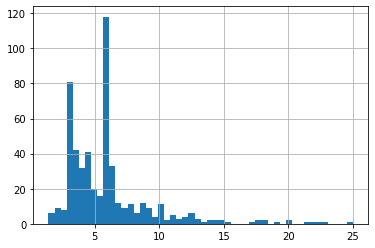

In [60]:
wage_imput['wage'].fillna(wage['wage'].mean()).hist(bins=50)

<AxesSubplot:>

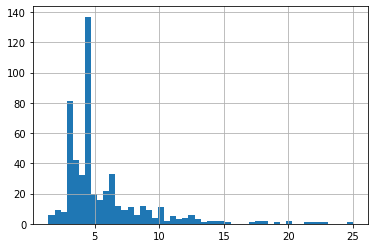

In [61]:
wage_imput['wage'].fillna(wage['wage'].median()).hist(bins=50)

### Estadísticos condicionados

In [62]:
wage_imput

,wage,educ,exper,tenure,gender,family_status
0,3.099609,11,2,0,female,single
1,NaN,12,22,2,female,married
2,3.000000,11,2,0,male,single
3,6.000000,8,44,28,male,married
4,NaN,12,7,2,male,married
...,...,...,...,...,...,...
519,15.000000,16,14,2,female,married
520,2.269531,10,2,0,female,single
521,4.671875,15,13,18,male,married
522,NaN,16,5,1,male,married


In [65]:
condition_mean = wage_imput.groupby(['gender', 'family_status'])['wage'].transform('mean')
condition_median = wage_imput.groupby(['gender', 'family_status'])['wage'].transform('median')

In [64]:
condition_mean.unique()

array([ 4.449701  ,  4.72609106,  5.41894531, 10.86783854,  7.31533093,
        7.391142  , 12.33076746,  7.84092882,  8.03515625,  4.25851004,
        6.11272321,  2.91015625, 10.25390625,  4.05102539,  2.20996094,
        9.703125  ,  3.94433594, 10.0625    ,  4.        ,  3.05078125])

<AxesSubplot:>

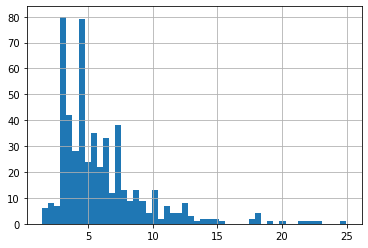

In [54]:
wage_imput['wage'].fillna(condition_mean).hist(bins=50)

<AxesSubplot:>

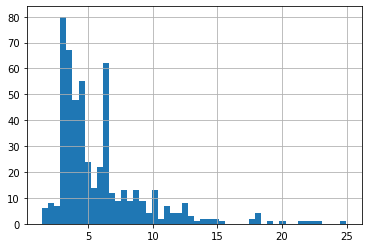

In [55]:
wage_imput['wage'].fillna(condition_median).hist(bins=50)

### Modelamiento

In [66]:
indic = MissingIndicator()
wage_imput['indicator_wage'] = indic.fit_transform(wage_imput).astype('int64')
wage_imput.head(10)

,wage,educ,exper,tenure,gender,family_status,indicator_wage
0,3.099609,11,2,0,female,single,0
1,NaN,12,22,2,female,married,1
2,3.000000,11,2,0,male,single,0
3,6.000000,8,44,28,male,married,0
4,NaN,12,7,2,male,married,1
5,8.750000,16,9,8,male,married,0
6,11.250000,18,15,7,male,single,0
7,NaN,12,5,3,female,single,1
8,3.599609,12,26,4,female,single,0
9,18.187500,17,22,21,male,married,0


In [67]:
wage_ohe = pd.get_dummies(wage_imput, drop_first=True)
wage_ohe

,wage,educ,exper,tenure,indicator_wage,gender_male,family_status_single
0,3.099609,11,2,0,0,0,1
1,NaN,12,22,2,1,0,0
2,3.000000,11,2,0,0,1,1
3,6.000000,8,44,28,0,1,0
4,NaN,12,7,2,1,1,0
...,...,...,...,...,...,...,...
519,15.000000,16,14,2,0,0,0
520,2.269531,10,2,0,0,0,1
521,4.671875,15,13,18,0,1,0
522,NaN,16,5,1,1,1,0


In [68]:
knn_imputer = KNNImputer(n_neighbors=4)
wage_knn = pd.DataFrame(knn_imputer.fit_transform(wage_ohe), columns=wage_ohe.columns)

In [70]:
wage_knn.isna().sum()

wage                    0
educ                    0
exper                   0
tenure                  0
indicator_wage          0
gender_male             0
family_status_single    0
dtype: int64

## Outliers

### Univariados

In [ ]:
def outliers_iqr(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lim_sup = q3 + (iqr * 1.5)
  lim_inf = q1 - (iqr * 1.5)
  return df[(df[col] >= lim_inf) & (df[col] <= lim_sup)]

<AxesSubplot:>

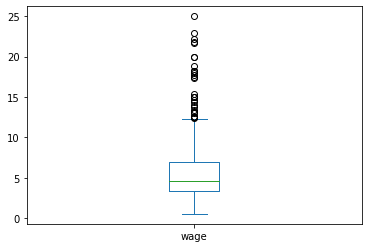

In [ ]:
wage['wage'].plot(kind='box')

<AxesSubplot:>

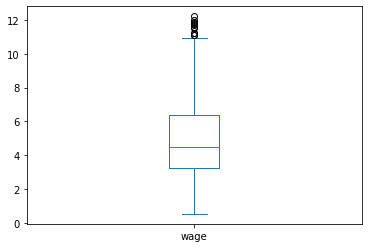

In [ ]:
wage_no_out = outliers_iqr(wage, 'wage')
wage_no_out['wage'].plot(kind='box')

### Multivariados

#### IsolationForest

In [ ]:
isol = IsolationForest(random_state=0).fit(wage_knn)
wage_knn['isol_forest'] = isol.predict(wage_knn)
wage_knn['isol_forest'].value_counts()

 1    336
-1    188
Name: isol_forest, dtype: int64

In [ ]:
wage_mah = wage_knn[['wage', 'educ', 'exper', 'tenure']]

In [ ]:
isol = IsolationForest(random_state=0).fit(wage_mah)
wage_mah['isol_forest'] = isol.predict(wage_mah)
wage_mah['isol_forest'].value_counts()

<ipython-input-289-943566b90645>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage_mah['isol_forest'] = isol.predict(wage_mah)


 1    418
-1    106
Name: isol_forest, dtype: int64

#### Mahalannobis

In [ ]:
wage_mah = wage_knn[['wage', 'educ', 'exper', 'tenure']]

In [ ]:
media = wage_mah.mean(axis=0)
covariance  = np.cov(wage_mah , rowvar=False)
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

In [ ]:
wage_mah['mahalanobis'] = np.diag(np.sqrt((wage_mah - media).values @ covariance_pm1 @ (wage_mah - media).values.T))

<ipython-input-292-ff57eee39caf>:1: RuntimeWarning: invalid value encountered in sqrt
  wage_mah['mahalanobis'] = np.diag(np.sqrt((wage_mah - media).values @ covariance_pm1 @ (wage_mah - media).values.T))
<ipython-input-292-ff57eee39caf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage_mah['mahalanobis'] = np.diag(np.sqrt((wage_mah - media).values @ covariance_pm1 @ (wage_mah - media).values.T))


In [ ]:
cutoff = st.chi2.ppf(0.95, wage_mah.shape[1] - 1)

outlier_indexes = np.where(wage_mah['mahalanobis'] > cutoff )

In [ ]:
outlier_indexes

(array([], dtype=int64),)

## Agrupamiento y tablas pivot

In [ ]:
wage_knn.pivot_table(index=['gender_male', 'family_status_single'], 
                     values='wage', 
                     aggfunc=['mean', 'median', 'min', 'max'])

mean    median       min        max
                                      wage      wage      wage       wage
gender_male family_status_single                                         
0.0         0.0                   4.757150  4.131592  1.500000  15.000000
            1.0                   4.743683  3.795166  0.529785  21.625000
1.0         0.0                   7.963922  6.500000  2.910156  24.984375
            1.0                   5.242641  4.511719  1.500000  12.500000

## Estadística descriptiva

### Medidas de tendencia central

In [ ]:
wage_knn.describe()

,wage,educ,exper,tenure,indicator_wage,gender_male,family_status_single,isol_forest
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,5.977221,12.566794,17.053435,5.124046,0.208015,0.519084,0.391221,0.282443
std,3.505958,2.773358,13.581037,7.231350,0.406276,0.500113,0.488490,0.960201
min,0.529785,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,3.500000,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,5.000000,12.000000,14.000000,2.000000,0.000000,1.000000,0.000000,1.000000
75%,7.203125,14.000000,26.000000,7.000000,0.000000,1.000000,1.000000,1.000000
max,24.984375,18.000000,51.000000,44.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
wage_knn.mean()

wage                     5.977221
educ                    12.566794
exper                   17.053435
tenure                   5.124046
indicator_wage           0.208015
gender_male              0.519084
family_status_single     0.391221
isol_forest              0.282443
dtype: float64

In [ ]:
wage_knn.median()

wage                     5.0
educ                    12.0
exper                   14.0
tenure                   2.0
indicator_wage           0.0
gender_male              1.0
family_status_single     0.0
isol_forest              1.0
dtype: float64

### Medidas de dispersión

In [ ]:
wage_knn.std()

wage                     3.505958
educ                     2.773358
exper                   13.581037
tenure                   7.231350
indicator_wage           0.406276
gender_male              0.500113
family_status_single     0.488490
isol_forest              0.960201
dtype: float64

In [ ]:
wage_knn.var()

wage                     12.291739
educ                      7.691515
exper                   184.444558
tenure                   52.292423
indicator_wage            0.165060
gender_male               0.250113
family_status_single      0.238623
isol_forest               0.921986
dtype: float64

### Medidas de asociación

In [ ]:
wage_knn[['wage','educ','exper','tenure']].corr()

,wage,educ,exper,tenure
wage,1.000000,0.418225,0.101012,0.355465
educ,0.418225,1.000000,-0.301331,-0.057284
exper,0.101012,-0.301331,1.000000,0.498497
tenure,0.355465,-0.057284,0.498497,1.000000


In [ ]:
wage_knn[['wage','educ','exper','tenure']].corr(method='spearman')

,wage,educ,exper,tenure
wage,1.000000,0.476467,0.155084,0.375362
educ,0.476467,1.000000,-0.202960,0.045098
exper,0.155084,-0.202960,1.000000,0.486385
tenure,0.375362,0.045098,0.486385,1.000000


In [71]:
pd.crosstab(wage['gender'], wage['family_status'])

family_status,married,single
gender,,
female,132,120
male,187,85


In [ ]:
st.chi2_contingency(pd.crosstab(wage['gender'], wage['family_status']))

(14.037180688724249,
 0.00017923144630718334,
 1,
 array([[153.41221374,  98.58778626],
        [165.58778626, 106.41221374]]))

In [ ]:
help(st.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

## Exploración gráfica

### Univariada

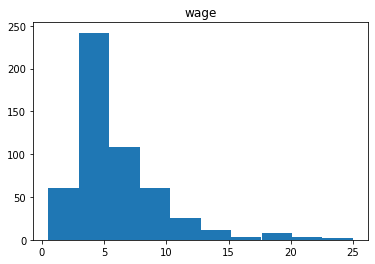

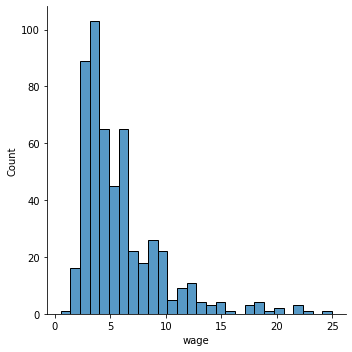

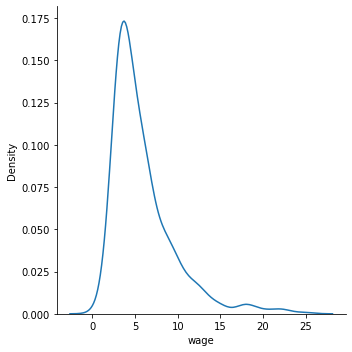

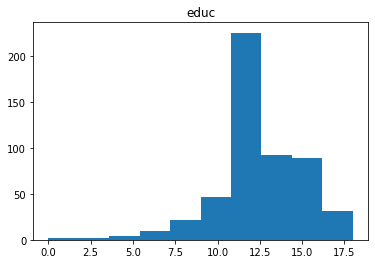

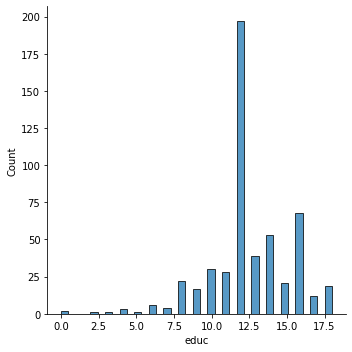

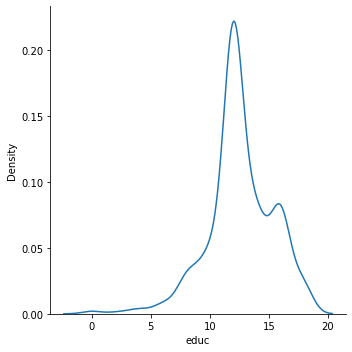

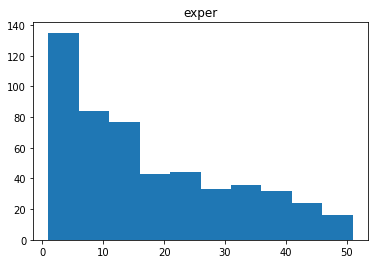

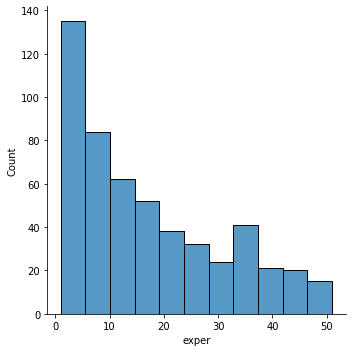

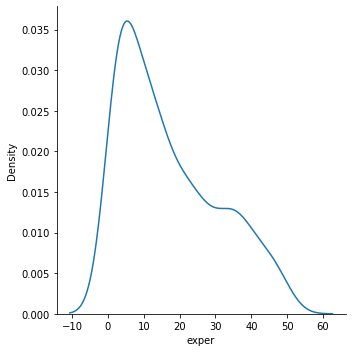

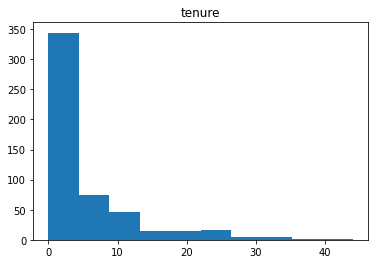

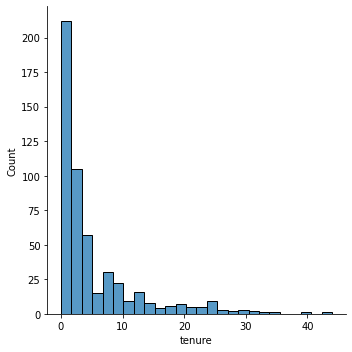

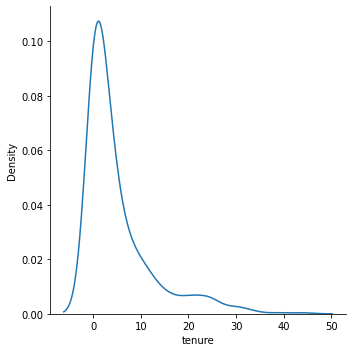

In [ ]:
data_cols = dict(numerical = ['wage', 'educ', 'exper', 'tenure'],
                categorical = ['gender', 'family_status'])
for col in data_cols['numerical']:
  plt.hist(wage[col])
  plt.title(col)
  plt.show()

  sns.displot(wage[col], kind='hist')
  plt.show()

  sns.displot(wage[col], kind='kde')
  plt.show()

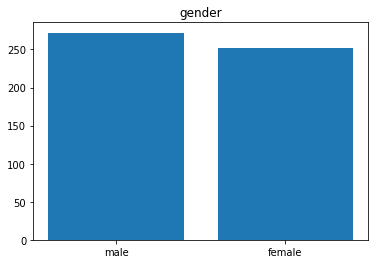

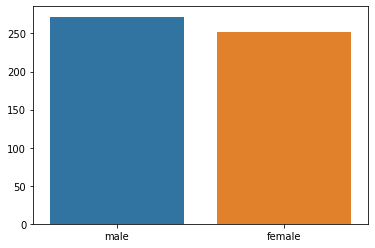

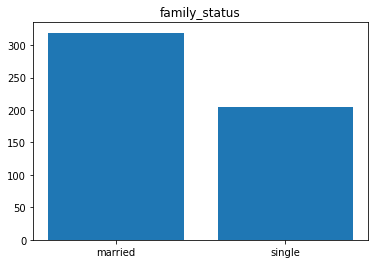

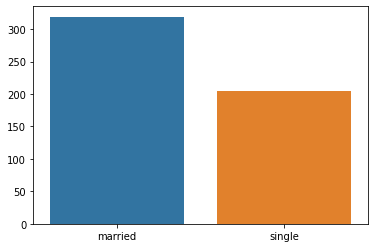

In [ ]:
for col in data_cols['categorical']:
  m = wage[col].value_counts()
  idx = m.index
  vals = m.values
  plt.title(col)
  plt.bar(m.index, m.values)
  plt.show()

  sns.barplot(x=m.index, y=m.values)
  plt.show()

### Multivariada

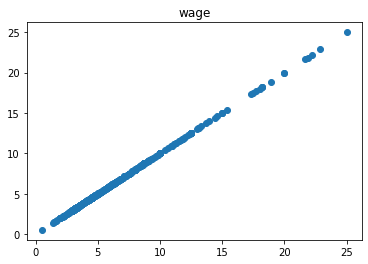

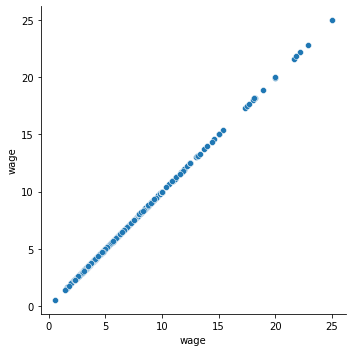

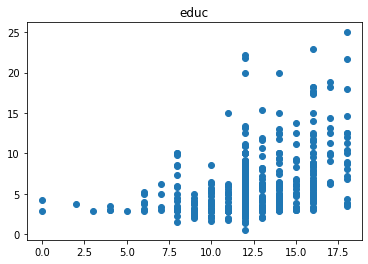

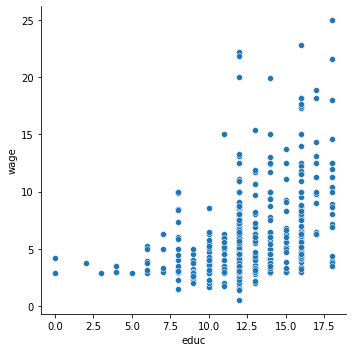

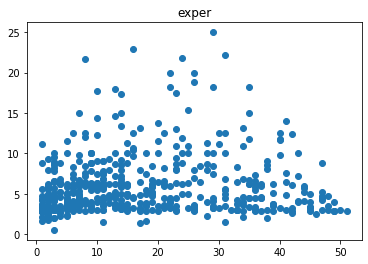

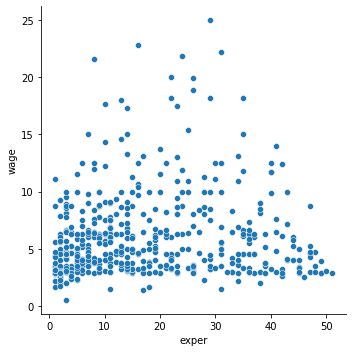

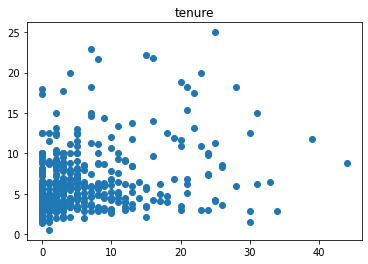

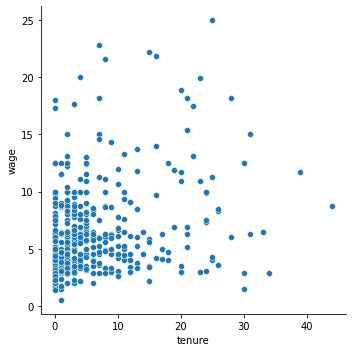

In [ ]:
for col in data_cols['numerical']:
  plt.scatter(wage[col], wage['wage'])
  plt.title(col)
  plt.show()

  sns.relplot(x=wage[col], y=wage['wage'], kind='scatter')
  plt.show()



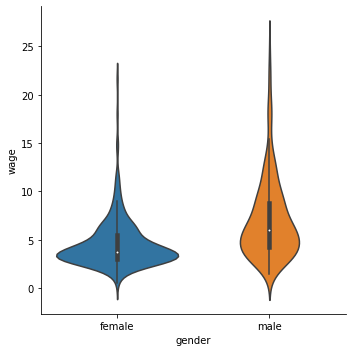

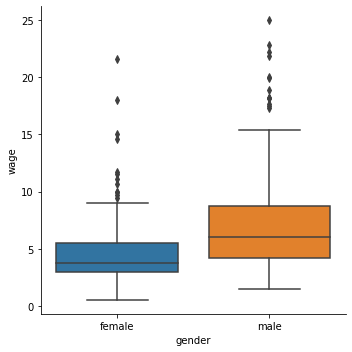

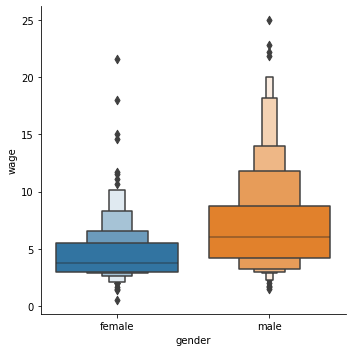

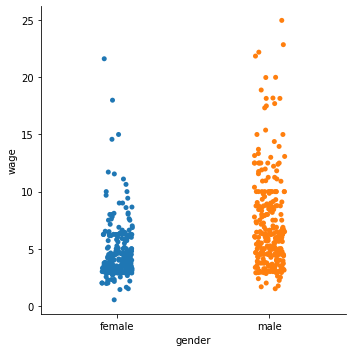

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


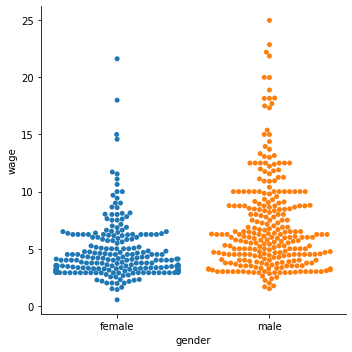

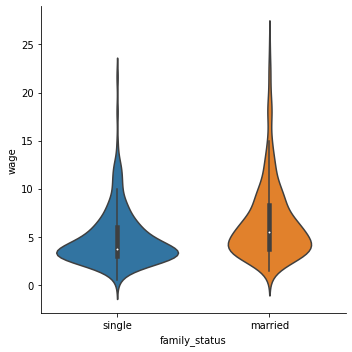

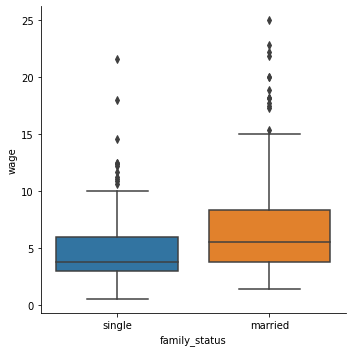

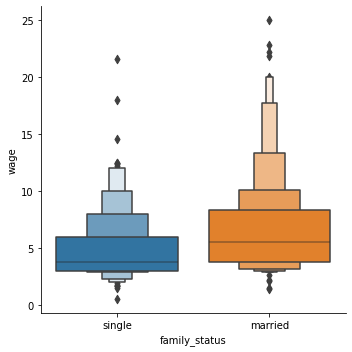

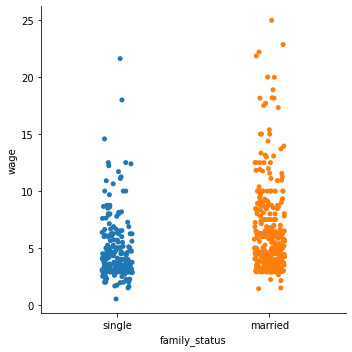

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


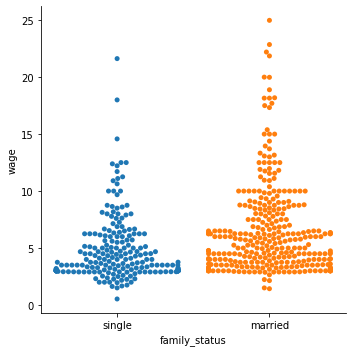

In [ ]:
for col in data_cols['categorical']:


  sns.catplot(data=wage, x=col, y='wage', kind='violin')
  plt.show()
  sns.catplot(data=wage, x=col, y='wage', kind='box')
  plt.show()

  sns.catplot(data=wage, x=col, y='wage', kind='boxen')
  plt.show()

  sns.catplot(data=wage, x=col, y='wage', kind='strip')
  plt.show()

  sns.catplot(data=wage, x=col, y='wage', kind='swarm')
  plt.show()

